Câu 1: Dựa vào dữ liệu thu nhập hàng tháng của khách hàng, ta tính thu nhập trung bình hàng tháng, đem dữ liệu thu thập so sánh với kết quả tìm được, ta có các id khách hàng có thu nhập cao (thu nhập cao hơn hoặc bằng giá trị trung bình): 5, 6, 7, 8, 10
Câu 2: Dựa vào bảng số liệu, ta chia khách hàng thành 3 nhóm tuổi:
- Dưới 25 tuổi: số lần mua sắm cao (7 lần)
- Từ 23-35 tuổi: số lần mua sắm trung bình 6 lần, giá trị trung bình đơn hàng cho mỗi lần mua sắm: 391000 vnd
- Trên 35 tuổi: số lần mua sắm trung bình thấp: 2 lần, giá trị trung bình đơn hàng cho mỗi lần mua sắm: 550000 vnd



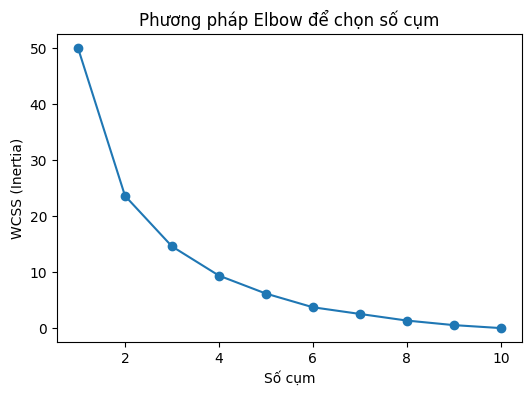

   ID  Tuổi  Thu nhập (VND)  Số lần mua sắm  Giá trị đơn hàng (VND)  Cluster
0   1    25        15000000               5                  300000        0
1   2    30        20000000               3                  400000        2
2   3    22        10000000               7                  250000        0
3   4    28        18000000               6                  280000        0
4   5    35        25000000               4                  350000        2
5   6    40        30000000               3                  600000        1
6   7    33        22000000               5                  320000        2
7   8    31        28000000               4                  450000        2
8   9    29        26000000               3                  380000        2
9  10    27        24000000               4                  360000        2


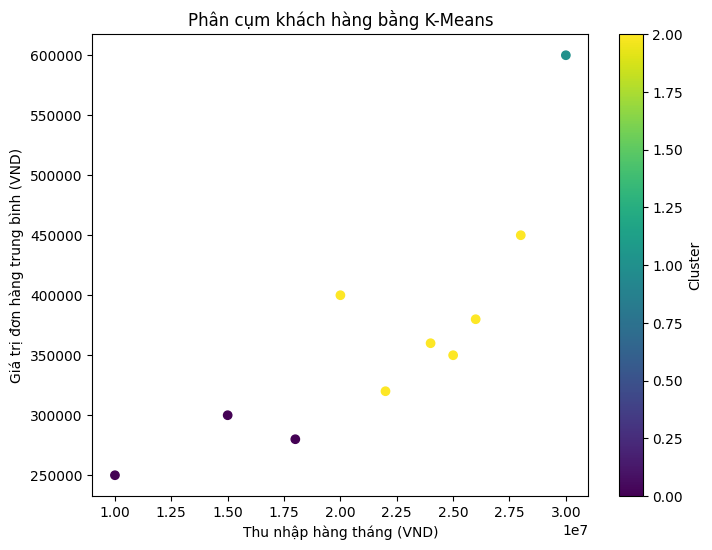

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Dữ liệu từ bảng (giả sử đã nhập vào)
data = {
    "ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Tuổi": [25, 30, 22, 28, 35, 40, 33, 31, 29, 27],
    "Thu nhập (VND)": [15000000, 20000000, 10000000, 18000000, 25000000, 30000000, 22000000, 28000000, 26000000, 24000000],
    "Số lần mua sắm": [5, 3, 7, 6, 4, 3, 5, 4, 3, 4],
    "Giá trị đơn hàng (VND)": [300000, 400000, 250000, 280000, 350000, 600000, 320000, 450000, 380000, 360000]
}

df = pd.DataFrame(data)

# Lựa chọn các đặc trưng để phân cụm
features = df[["Tuổi", "Thu nhập (VND)", "Số lần mua sắm", "Giá trị đơn hàng (VND)"]]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)

# Xác định số cụm bằng phương pháp Elbow
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Số cụm')
plt.ylabel('WCSS (Inertia)')
plt.title('Phương pháp Elbow để chọn số cụm')
plt.show()

# Áp dụng K-Means với số cụm tối ưu (chọn k=3 tương ứng với 3 nhóm độ tuổi khách hàng)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Hiển thị kết quả
print(df)

# Trực quan hóa dữ liệu với 2 đặc trưng chính (thu nhập và giá trị đơn hàng)
plt.figure(figsize=(8,6))
plt.scatter(df["Thu nhập (VND)"], df["Giá trị đơn hàng (VND)"], c=df["Cluster"], cmap='viridis')
plt.xlabel("Thu nhập hàng tháng (VND)")
plt.ylabel("Giá trị đơn hàng trung bình (VND)")
plt.title("Phân cụm khách hàng bằng K-Means")
plt.colorbar(label="Cluster")
plt.show()
